In [1]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%run Data_manipulation.ipynb

In [3]:
# Local outlier factor

def detect_anomalies_lof(df, n_neighbors=50, contamination=0.1):
    """
    Detect anomalies in a time series using Local Outlier Factor (LOF).

    Parameters:
    - df: DataFrame containing the time series data with a 'Close' column.
    - n_neighbors: Number of neighbors to use for LOF.
    - contamination: The proportion of anomalies in the data set.

    Returns:
    - anomalies: DataFrame containing the detected anomalies.
    """
    # Selecting the 'Close' column for anomaly detection
    data = df['Close'].values.reshape(-1, 1)

    # Initialize Local Outlier Factor
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)

    # Fit the model and predict anomalies
    anomaly_labels = lof.fit_predict(data)
    
    # Anomalies are labeled as -1
    anomalies = df[anomaly_labels == -1]
    
    # Plot the time series data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomaly')
    plt.title('Time Series Data with Anomalies Detected using LOF')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return anomalies


# NIFTY

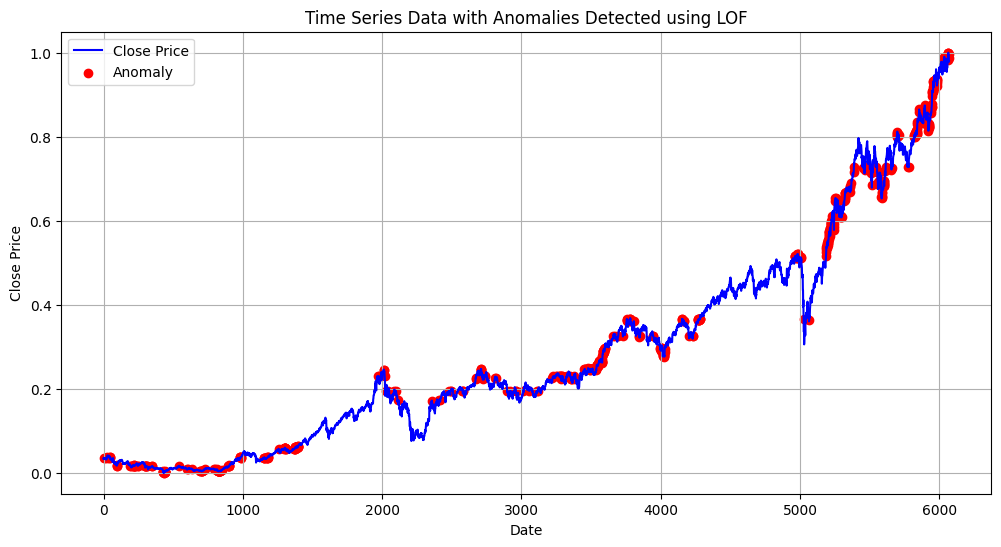

Anomalies:


,Close,Open,High,Low,Volume (in Billion)
Date,,,,,
2000-01-04,0.035476,0.033418,0.034405,0.033750,0.021305
2000-01-19,0.035302,0.034123,0.034517,0.034405,0.023619
2000-02-07,0.035381,0.033661,0.034582,0.033994,0.019029
2000-02-08,0.036564,0.035320,0.035941,0.035663,0.022370
2000-02-29,0.036204,0.039207,0.040762,0.035198,0.027219
...,...,...,...,...,...
2024-05-23,1.000000,0.980850,0.994729,0.985015,0.204090
2024-05-24,0.999523,0.995123,0.996204,1.000000,0.144535
2024-05-27,0.998408,1.000000,1.000000,0.998332,0.143475


In [11]:
NIFTY = pd.read_csv('D:/UFG/Data collection/NIFTY.csv')
NIFTY['Date']= pd.to_datetime(NIFTY['Date'], format='%Y-%m-%d')
#NIFTY.set_index('Date', inplace=True)

scaled_data, scaler = scale_data(NIFTY)

# Detect anomalies
anomalies = detect_anomalies_lof(scaled_data)
anomalies.set_index('Date', inplace=True)

# Display anomalies (dates)
print("Anomalies:")
anomalies

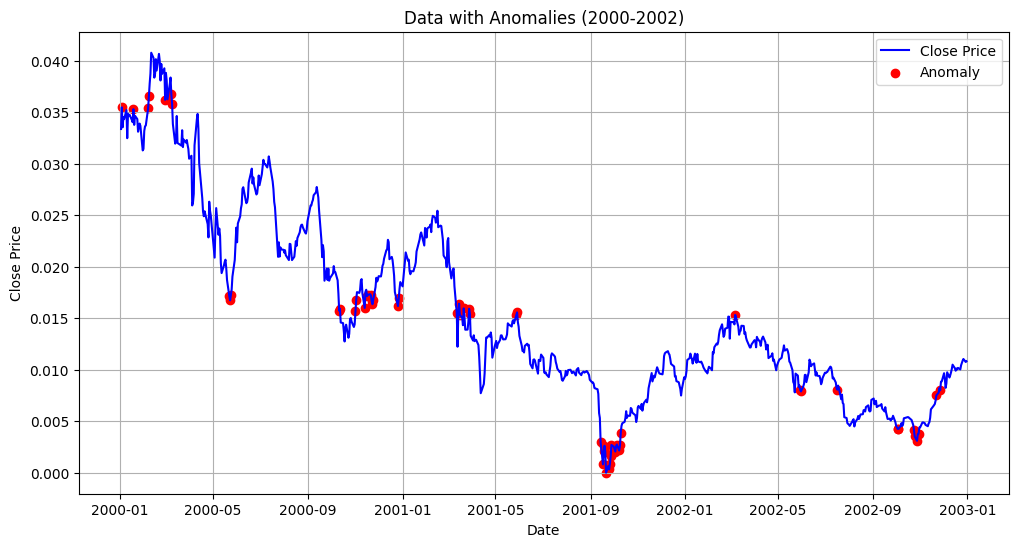

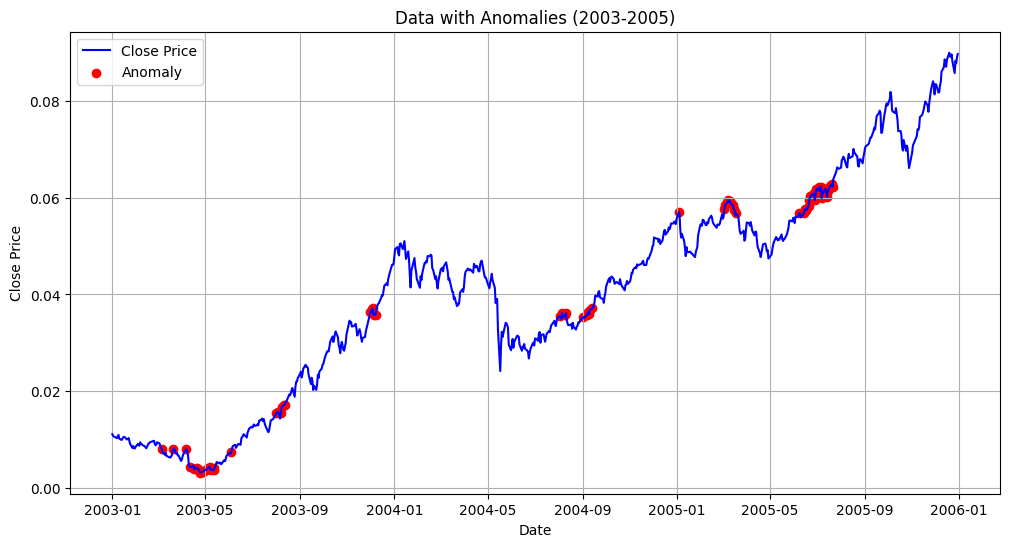

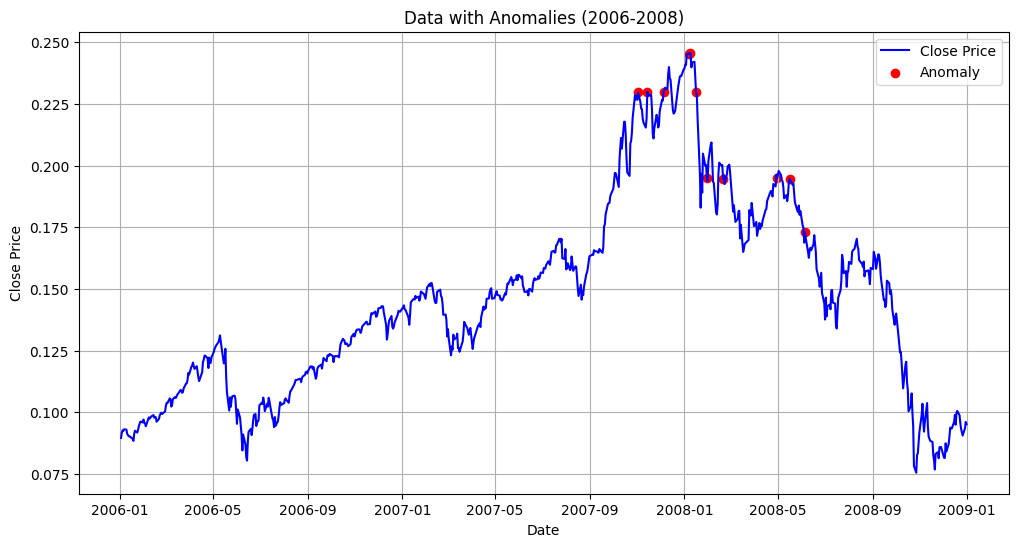

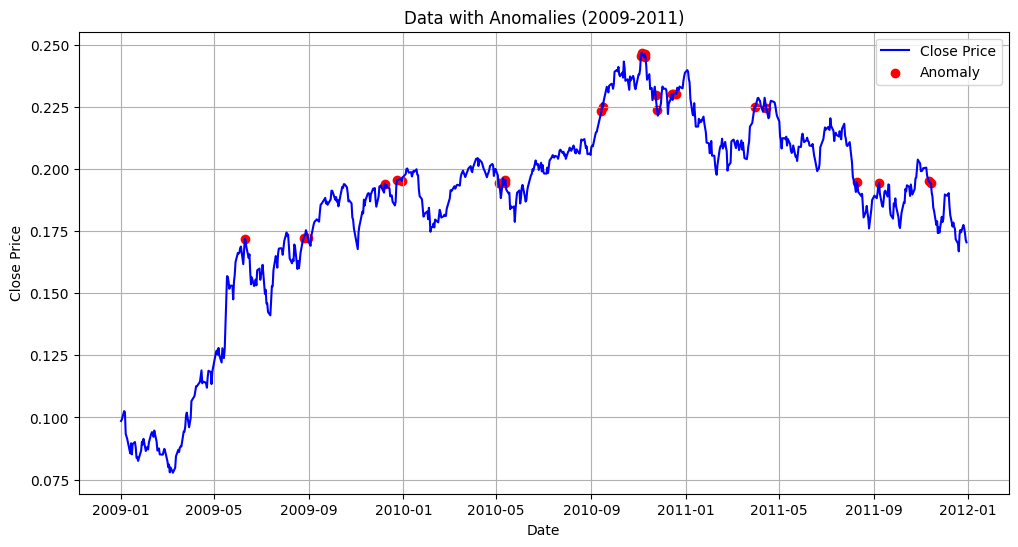

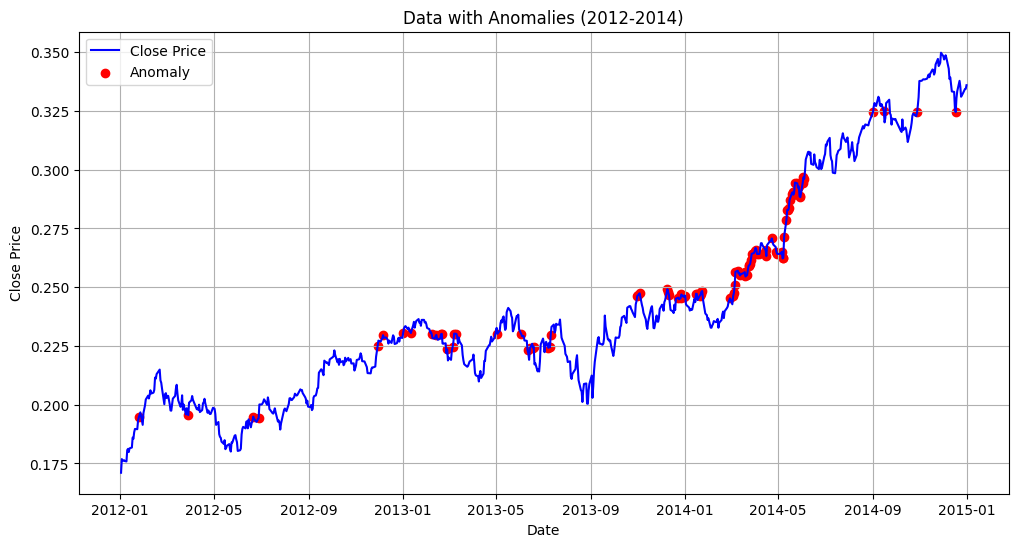

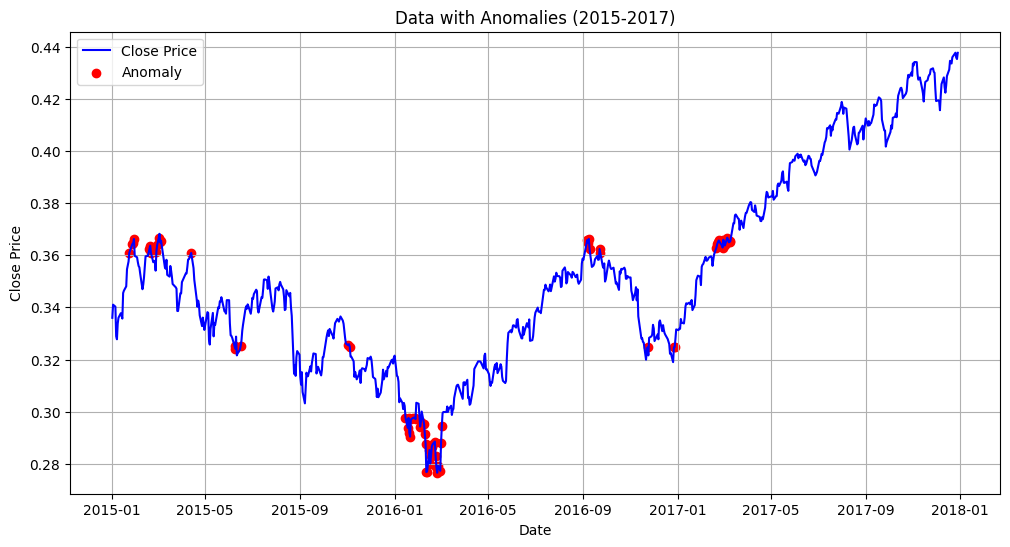

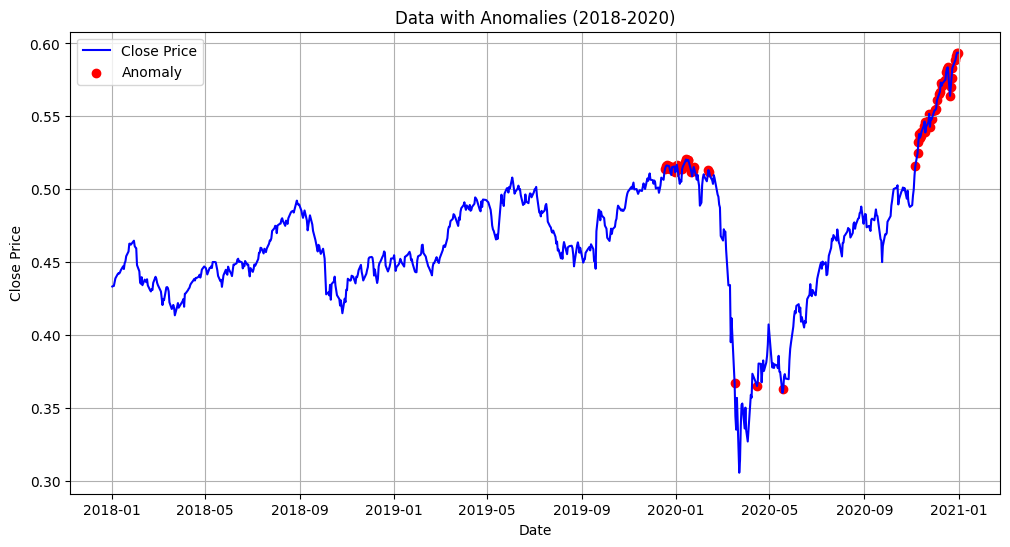

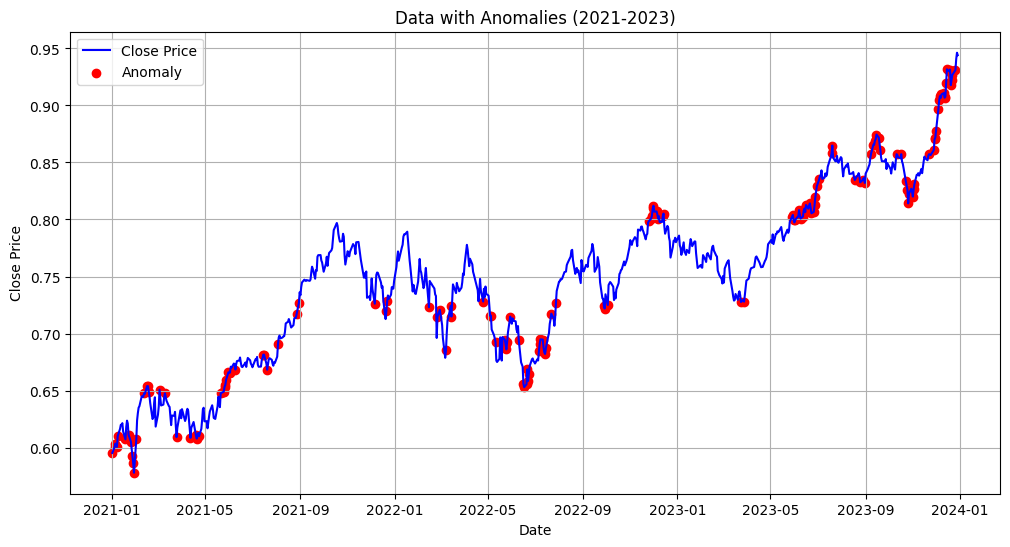

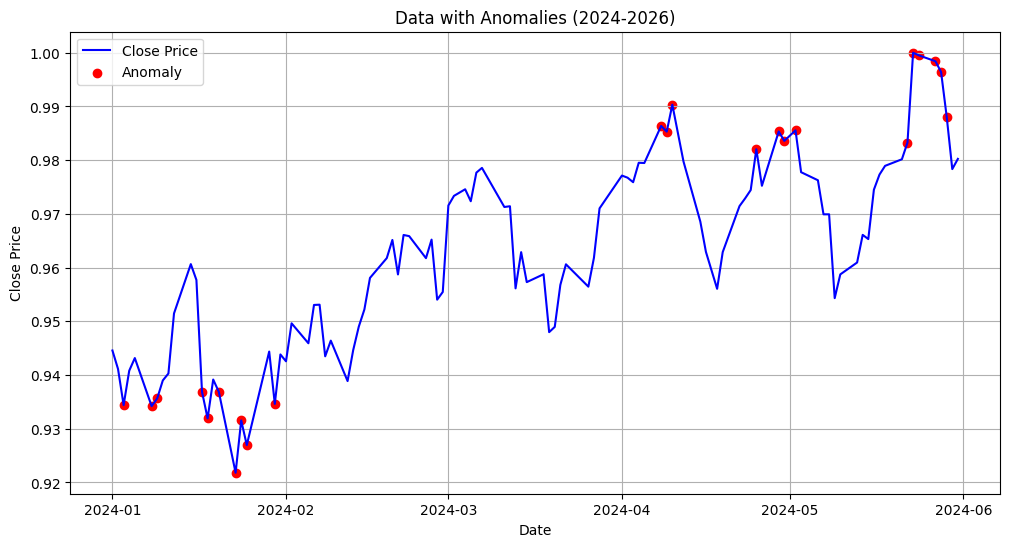

In [12]:
NIFTY_3 = plot_with_anomalies(scaled_data, anomalies, 3)

# IBOVESPA

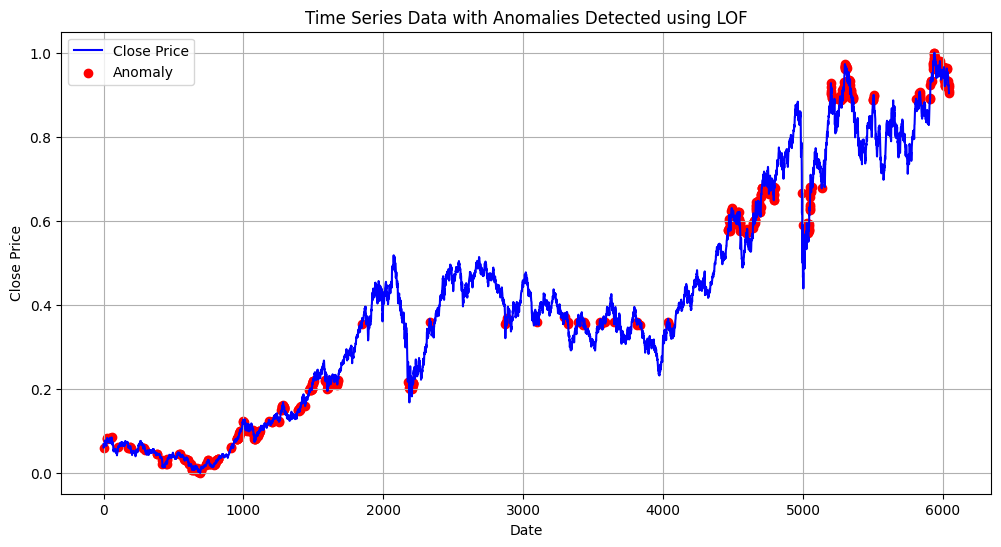

In [13]:
IBOV = pd.read_csv("D:/UFG/Data collection/IBOV.csv")
IBOV['Date'] = pd.to_datetime(IBOV['Date'], format='%Y-%m-%d')
#IBOV.set_index('Date', inplace=True)

scaled_data, scaler = scale_data(IBOV)

anomalies = detect_anomalies_lof(scaled_data)
anomalies.set_index('Date', inplace=True)

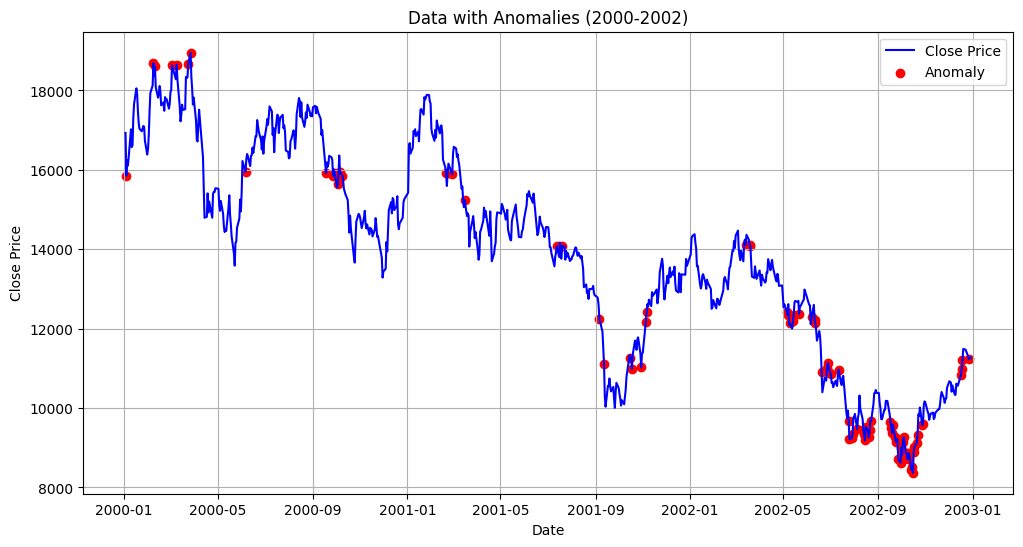

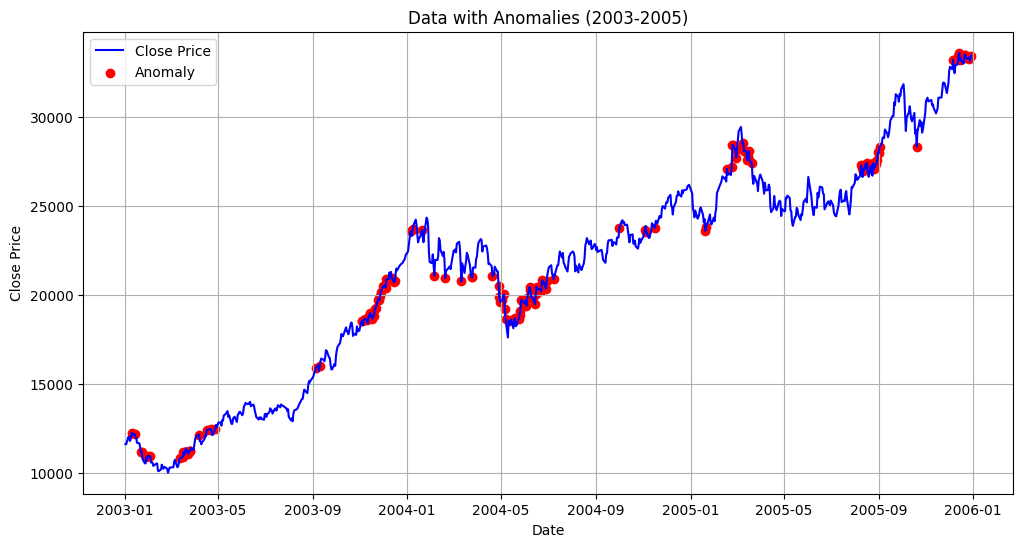

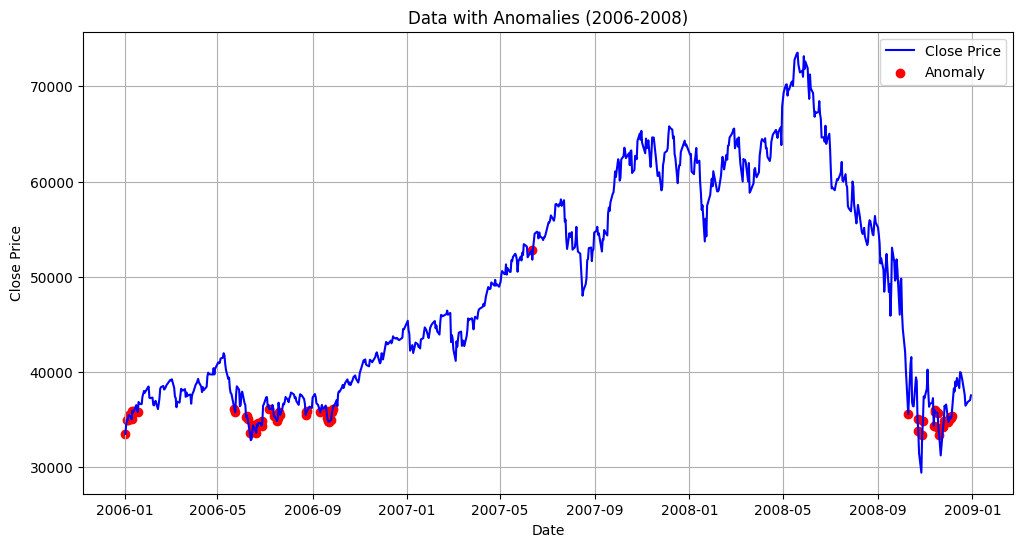

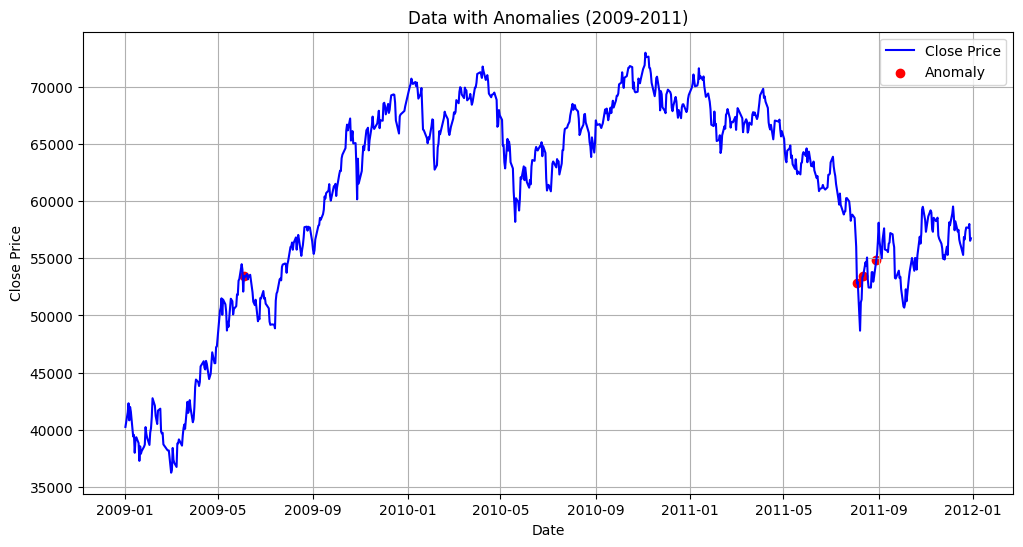

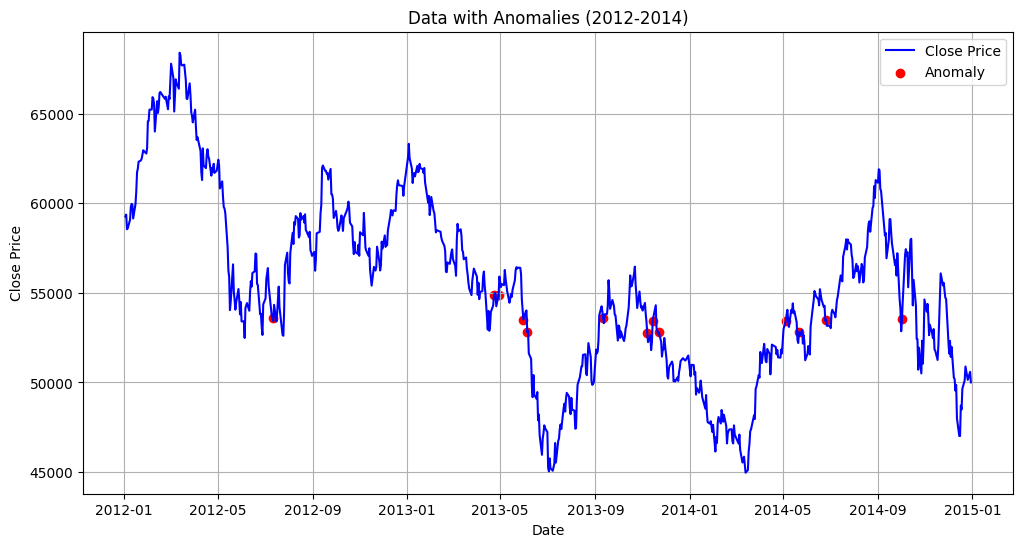

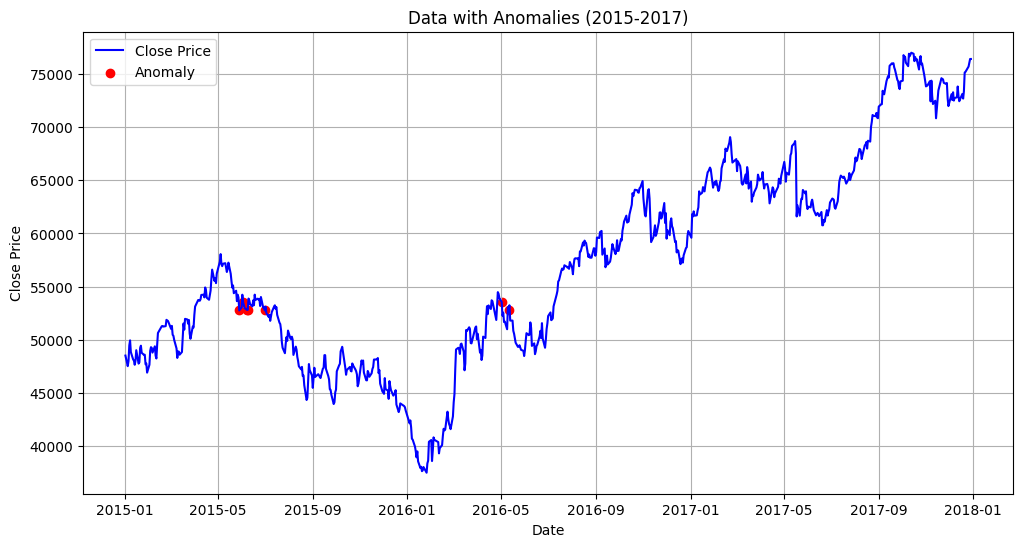

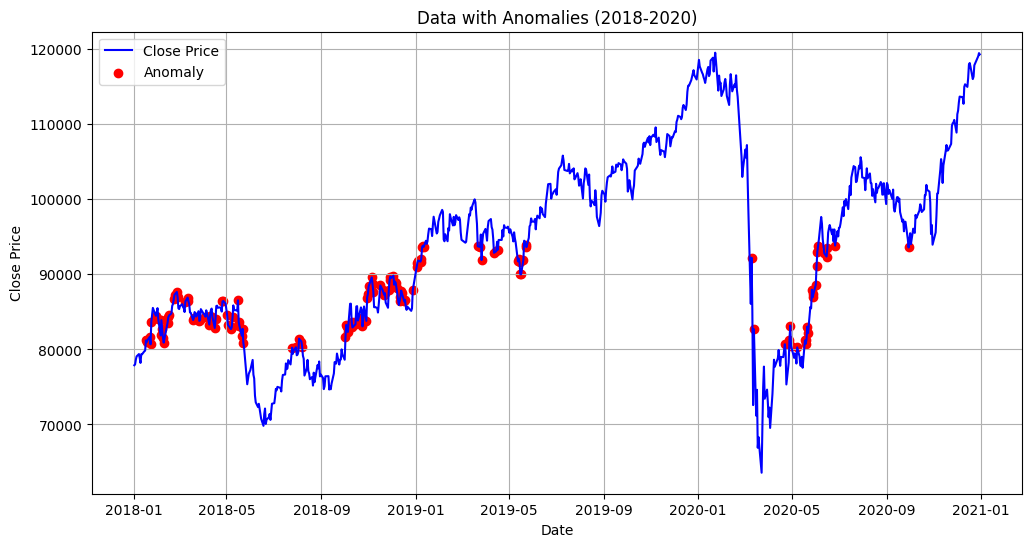

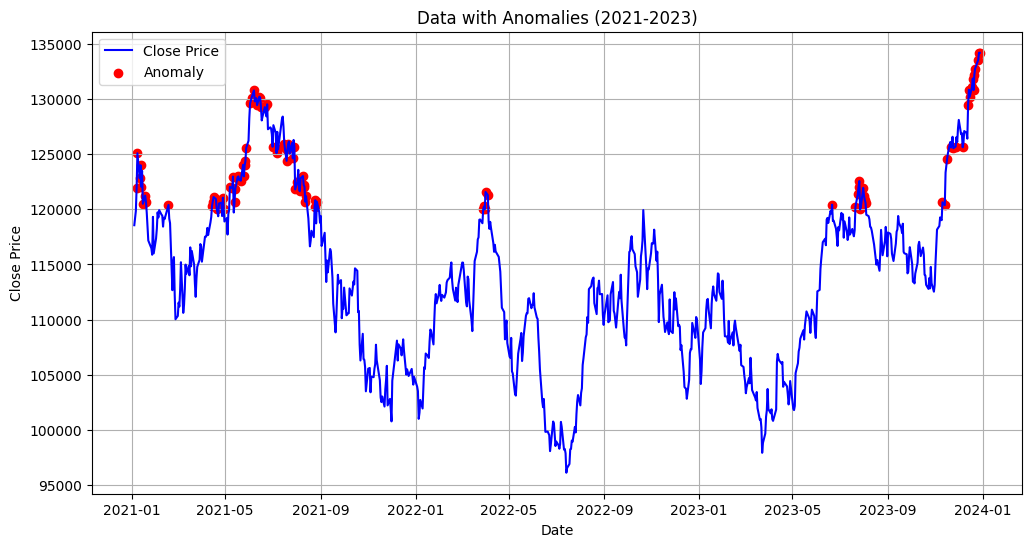

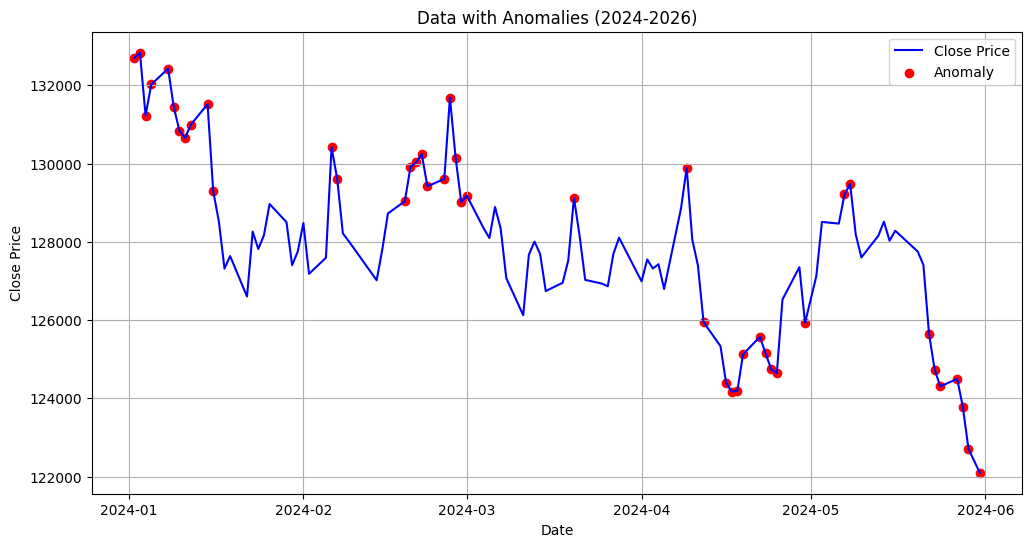

In [14]:
IBOV_3 = plot_with_anomalies(IBOV, anomalies, 3)